In [2]:
#import module dan file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

netflix = pd.read_csv('netflix_titles - data_india.csv')
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1046 non-null   object
 1   type          1046 non-null   object
 2   title         1046 non-null   object
 3   date_added    1046 non-null   object
 4   release_year  1046 non-null   int64 
 5   rating        1046 non-null   object
 6   listed_in     1046 non-null   object
dtypes: int64(1), object(6)
memory usage: 57.3+ KB


In [3]:
netflix

,show_id,type,title,date_added,release_year,rating,listed_in
0,s5,TV Show,Kota Factory,"September 24, 2021",2021,R,"International TV Shows, Romantic TV Shows, TV ..."
1,s25,Movie,Jeans,"September 21, 2021",1998,PG-13,"Comedies, International Movies, Romantic Movies"
2,s30,Movie,Paranoia,"September 19, 2021",2013,PG-13,Thrillers
3,s40,TV Show,Chhota Bheem,"September 16, 2021",2021,PG,Kids' TV
4,s51,TV Show,Dharmakshetra,"September 15, 2021",2014,PG,"International TV Shows, TV Dramas, TV Sci-Fi &..."
...,...,...,...,...,...,...,...
1041,s8774,Movie,Yanda Kartavya Aahe,"January 1, 2018",2006,PG,"Comedies, Dramas, International Movies"
1042,s8776,TV Show,Yeh Meri Family,"August 31, 2018",2018,PG,"International TV Shows, TV Comedies"
1043,s8799,Movie,Zed Plus,"December 31, 2019",2014,R,"Comedies, Dramas, International Movies"
1044,s8800,Movie,Zenda,"February 15, 2018",2009,PG-13,"Dramas, International Movies"


In [4]:
netflix['rating'].value_counts()

PG-13    583
R        271
PG       175
G         10
UR         7
Name: rating, dtype: int64

In [5]:
netflix['listed_in'].value_counts()

Comedies, Dramas, International Movies                   124
Dramas, International Movies                             123
Dramas, Independent Movies, International Movies         121
Dramas, International Movies, Romantic Movies             64
Action & Adventure, Dramas, International Movies          55
                                                        ... 
International TV Shows, TV Dramas, TV Horror               1
Comedies, International Movies, Sports Movies              1
Children & Family Movies, Dramas, Independent Movies       1
International TV Shows, Reality TV, Romantic TV Shows      1
Comedies, Dramas                                           1
Name: listed_in, Length: 99, dtype: int64

In [6]:
df_genre = (netflix.drop('listed_in', axis=1).join
             (netflix['listed_in'].str.split(', ',expand=True).stack().reset_index(drop=True, level=1).rename('genre'))
             )

genre = df_genre['genre'].value_counts()
print('total genre ada : ', genre.sum())
total_konten = netflix['show_id'].value_counts().sum()
print("jumlah genre ada : ", genre.count())
print('total konten ada : ', total_konten.sum())

print(genre)

total genre ada :  2804
jumlah genre ada :  35
total konten ada :  1046
International Movies            864
Dramas                          662
Comedies                        323
Independent Movies              167
Action & Adventure              137
Romantic Movies                 120
Music & Musicals                 96
Thrillers                        92
International TV Shows           66
Horror Movies                    35
TV Dramas                        28
Documentaries                    27
Children & Family Movies         26
TV Comedies                      26
Sports Movies                    17
Romantic TV Shows                12
Kids' TV                         12
Sci-Fi & Fantasy                 12
Classic Movies                   11
Docuseries                        9
Crime TV Shows                    9
TV Horror                         7
Reality TV                        6
Stand-Up Comedy                   6
Cult Movies                       5
TV Action & Adventure       

In [7]:
genre_3 = netflix['listed_in'].str.split(', ', 2, expand=True).rename(columns={0: 'genre (a)', 1: 'genre (b)', 2: 'genre (c)'})
genre_3

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17356\2438111320.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  genre_3 = netflix['listed_in'].str.split(', ', 2, expand=True).rename(columns={0: 'genre (a)', 1: 'genre (b)', 2: 'genre (c)'})


,genre (a),genre (b),genre (c)
0,International TV Shows,Romantic TV Shows,TV Comedies
1,Comedies,International Movies,Romantic Movies
2,Thrillers,None,None
3,Kids' TV,None,None
4,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
...,...,...,...
1041,Comedies,Dramas,International Movies
1042,International TV Shows,TV Comedies,None
1043,Comedies,Dramas,International Movies
1044,Dramas,International Movies,None


In [8]:
genre_pri = genre_3['genre (a)']
print(genre_pri.unique())
print()
print('total genre primer : ', genre_pri.nunique())


['International TV Shows' 'Comedies' 'Thrillers' "Kids' TV" 'Docuseries'
 'Action & Adventure' 'Dramas' 'Horror Movies' 'TV Shows'
 'Children & Family Movies' 'International Movies' 'Reality TV'
 'Documentaries' 'Stand-Up Comedy' 'British TV Shows' 'Cult Movies'
 'Crime TV Shows' 'Classic Movies' 'Independent Movies']

total genre primer :  19


In [9]:
netflix.groupby('type')['show_id'].count().reset_index()

,type,show_id
0,Movie,962
1,TV Show,84


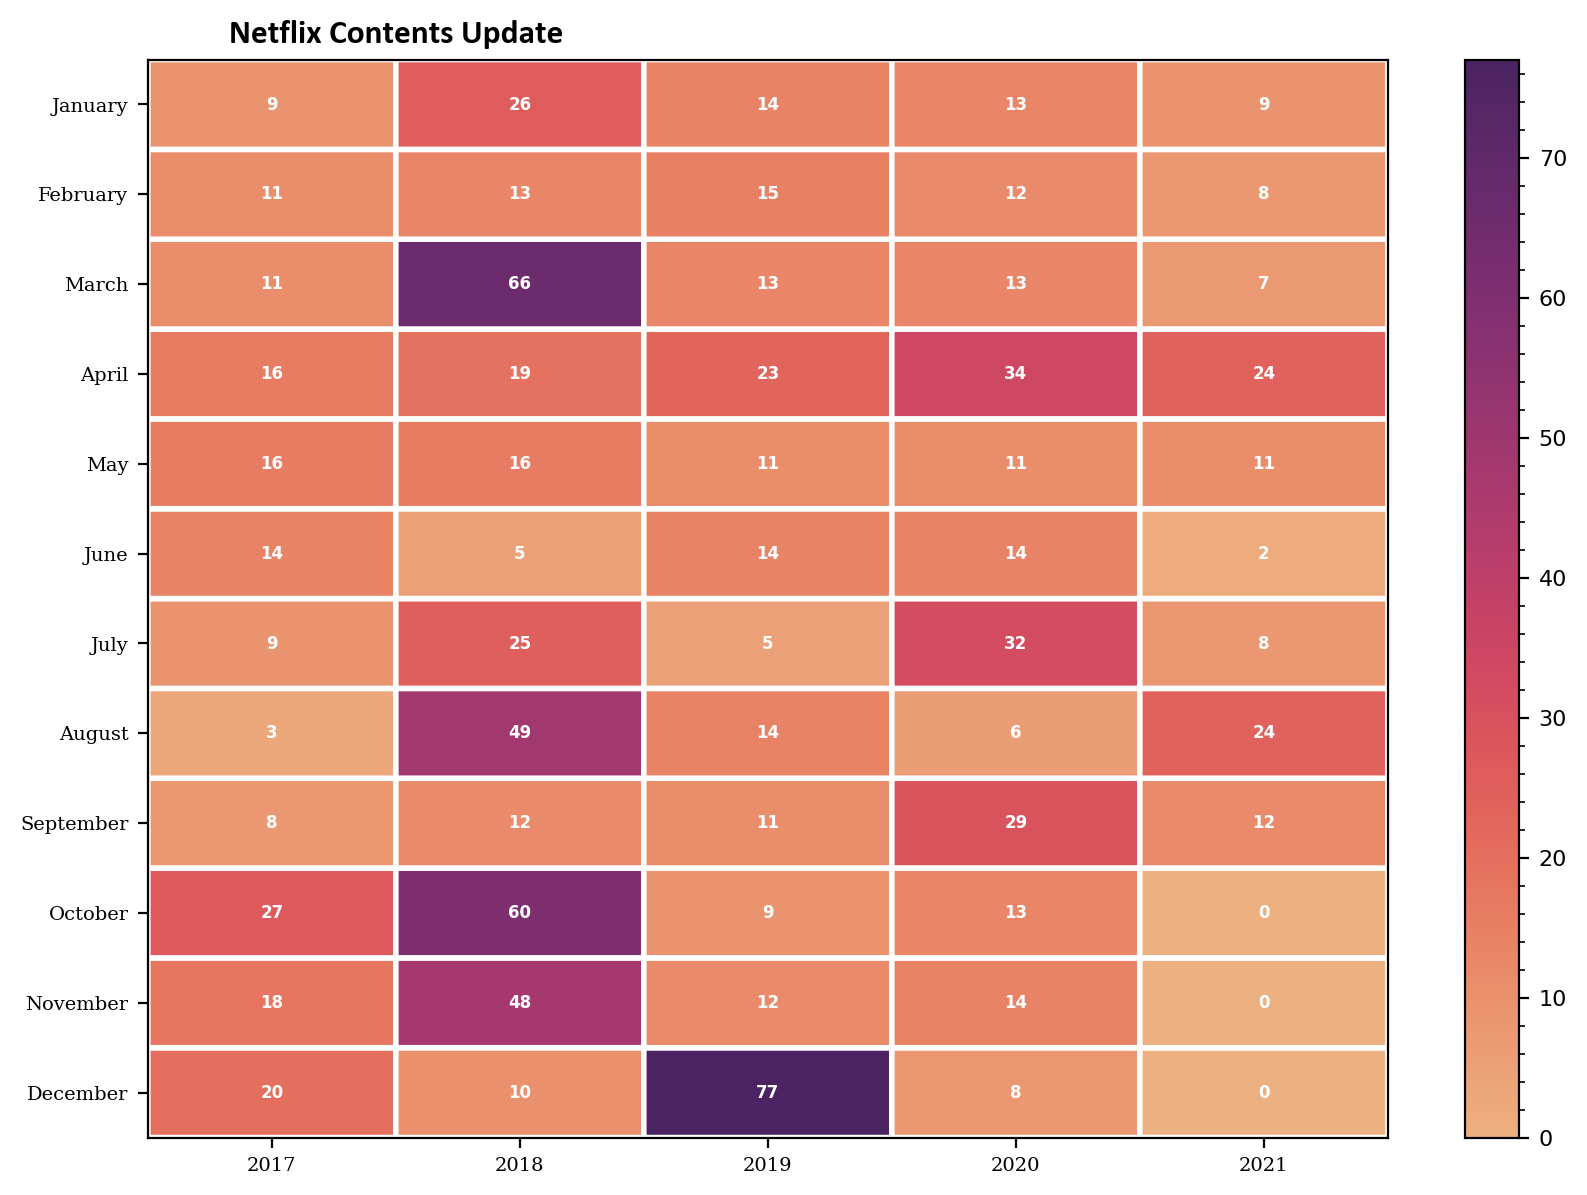

In [15]:
netflix_date = netflix[['date_added']].dropna()

netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]

# Hapus data tahun 2016
netflix_date = netflix_date[netflix_date['year'] != '2016']

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)

# heatmap
heatmap = plt.pcolor(df, cmap='flare', edgecolors='white', linewidths=2) 
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')
plt.title('Netflix Contents Update', fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))

# Tambahkan angka presisi di setiap kotak
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        plt.text(j + 0.5, i + 0.5, f"{df.iloc[i, j]:.0f}", ha='center', va='center', fontsize=6, fontweight='bold', color='white')

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()


   release_year  show_id  type  title  date_added  rating  listed_in
0          2017      111   111    111         111     111        111
1          2018      101   101    101         101     101        101
2          2019       93    93     93          93      93         93
3          2016       80    80     80          80      80         80
4          2020       77    77     77          77      77         77


<BarContainer object of 5 artists>

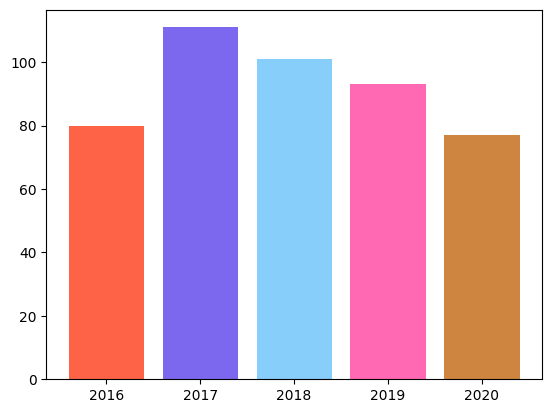

In [11]:
top_year = netflix.groupby('release_year').count().sort_values('title',ascending=False).head(5)
top_year.reset_index(inplace=True)
print(top_year)

plt.bar(top_year.release_year,top_year.title, color=['mediumslateblue','lightskyblue','hotpink','tomato','peru'])

   index  rating
0  PG-13     583
1      R     271
2     PG     175
3      G      10
4     UR       7


<AxesSubplot: xlabel='rating', ylabel='jumlah'>

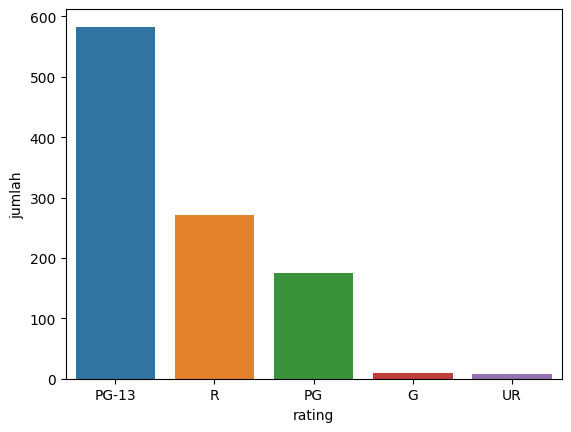

In [12]:
netflix_rating = netflix['rating'].value_counts()
netflix_rating = pd.DataFrame(netflix_rating).reset_index()
print(netflix_rating)
netflix_rating.columns = ['rating','jumlah']
sns.barplot(x = 'rating',y = 'jumlah', data=netflix_rating.head(5))